🟢 No current problems: https://downdetector.com/status/box/
Most reported problems:
100% Website


🟢 No current problems: https://downdetector.com/status/zoom/
Most reported problems:
48% Server Connection
34% Starting Conference
18% App


🟢 No current problems: https://downdetector.com/status/service-now/
Most reported problems:
64% Website
29% Total blackout
7% Managed Services


🟢 No current problems: https://downdetector.com/status/netsuite/
Most reported problems:
100% Server Connection


🟡 Having possible problems: https://downdetector.com/status/microsoft-365/
Most reported problems:
41% Onedrive
30% Server Connection
28% Outlook




🟢 No current problems: https://downdetector.com/status/reddit/
Most reported problems:
63% Website
23% App
14% Server Connection


🟢 No current problems: https://downdetector.com/status/life360/
Most reported problems:
89% App
11% Login


🟢 No current problems: https://downdetector.com/status/yahoo/
Most reported problems:
64% Website
26% Login
10% 

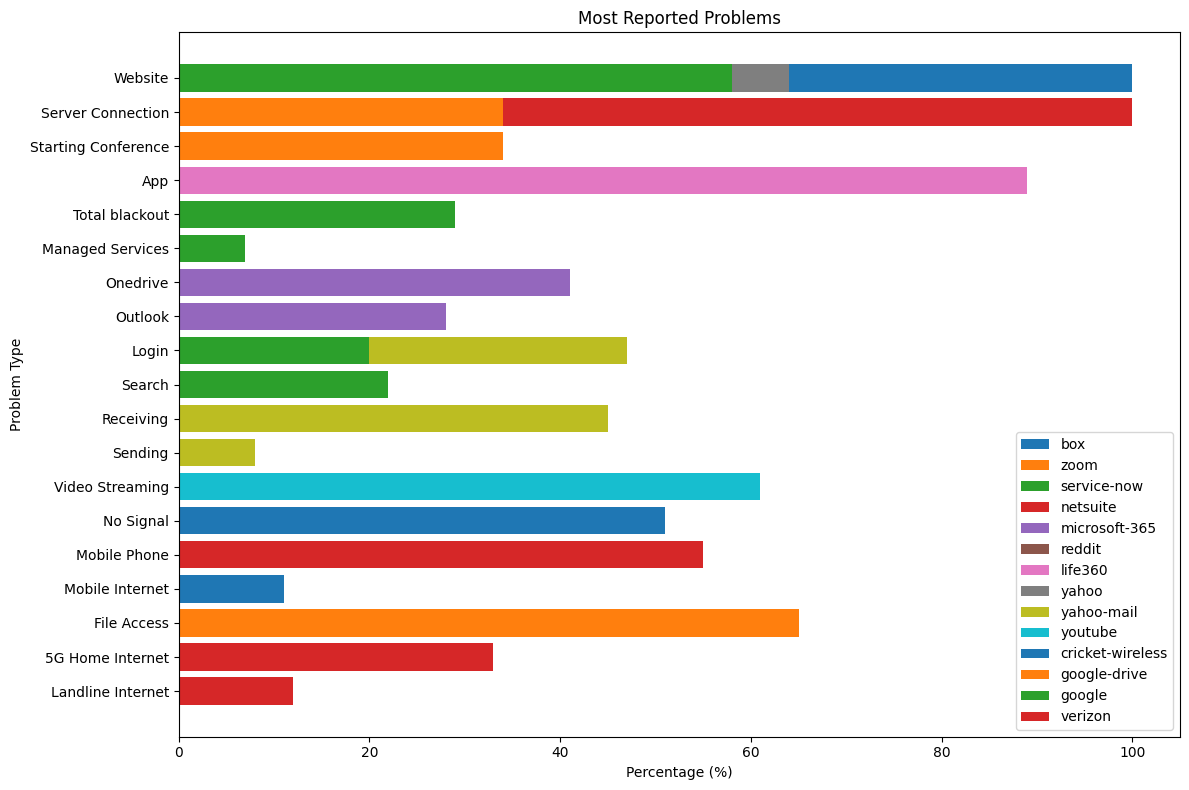

In [3]:
# Max Gadeberg
# Aug 29, 2024

from selenium import webdriver
import re
import matplotlib.pyplot as plt
import csv

urls = []

csv_file = 'sites.csv'

with open(csv_file, 'r', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if row:
            urls.append(row[0])

driver = webdriver.Firefox()

problem_data = {}

for url in urls:
    driver.get(url)
    if url == 'https://downdetector.com/status/reddit/':
        print('\n')
    
    try:
        page_source = driver.page_source
        
        match_no_problems = re.search(r'User reports indicate no current problems', page_source)
        match_possible_problems = re.search(r'User reports indicate possible problems', page_source)
        match_problems = re.search(r'User reports indicate problems', page_source)
        
        matches = re.findall(r'data:\s*\[\s*(\d+\.\d+)\s*,\s*\(100\s*-\s*\d+\.\d+\)\s*\]', page_source)
        labels_matches = re.findall(r'<div class="text-center text-muted indicatorChart_name">\s*(.*?)\s*</div>', page_source, re.S)
        
        rounded_percentages = [round(float(match)) for match in matches]
        labels = [label.strip() for label in labels_matches]
        
        if match_no_problems:
            print(f"🟢 No current problems: {url}")
        elif match_possible_problems:
            print(f"🟡 Having possible problems: {url}")
        elif match_problems:
            print(f"🔴 Having problems: {url}")
        else:
            print(f"❓ Status unclear for {url}")
        
        if labels and rounded_percentages:
            problem_data[url] = {
                'labels': labels,
                'percentages': rounded_percentages
            }
        
        if labels and rounded_percentages:
            print("Most reported problems:")
            for label, percentage in zip(labels, rounded_percentages):
                print(f"{percentage}% {label}")

        print('\n')
        
    except Exception as e:
        print(f"{url}: Unable to determine status (error: {str(e)})")

driver.quit()

plt.figure(figsize=(12, 8))

for url, data in problem_data.items():
    labels = data['labels']
    percentages = data['percentages']
    
    plt.barh(labels, percentages, label=url.split('/')[-2])

plt.xlabel('Percentage (%)')
plt.ylabel('Problem Type')
plt.title('Most Reported Problems')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()
